<a href="https://colab.research.google.com/github/HystonKayange/JCL/blob/master/Final_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maize leaf disease classification

In [13]:
# import libraries that have been used
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob


In [14]:
# Access google drive custom Dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive


In [15]:
# Data Augumentation and spliting our data into training and Validation set

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split =0.2

                                                         )

training_set = train_datagen.flow_from_directory(dataset_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 subset= "training")

test_set = train_datagen.flow_from_directory(dataset_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            subset = 'validation')


Found 3350 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [16]:
# now lets import InceptionV3 for transfer learning we have removed the first layer and last as we will use custom
# We will imagenet weights
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [17]:
for layer in inception.layers:
  layer.trainable = False

In [18]:
# lets now get number of output classes
folders = glob(dataset_path)

In [19]:
x = Flatten()(inception.output)

In [20]:
prediction = Dense(4, activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)

In [70]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [22]:
# Compile Model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# Now lets fit the model for training our dataset
hk = model.fit(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/25
210/210 [==============================] - 494s 2s/step - loss: 1.6633 - accuracy: 0.8230 - val_loss: 2.7895 - val_accuracy: 0.8361
Epoch 2/25
210/210 [==============================] - 342s 2s/step - loss: 2.1188 - accuracy: 0.8478 - val_loss: 1.6993 - val_accuracy: 0.8876
Epoch 3/25
210/210 [==============================] - 346s 2s/step - loss: 1.5559 - accuracy: 0.8916 - val_loss: 1.6255 - val_accuracy: 0.8804
Epoch 4/25
210/210 [==============================] - 338s 2s/step - loss: 1.2867 - accuracy: 0.9087 - val_loss: 2.0453 - val_accuracy: 0.8864
Epoch 5/25
210/210 [==============================] - 335s 2s/step - loss: 1.1225 - accuracy: 0.9152 - val_loss: 2.2176 - val_accuracy: 0.8864
Epoch 6/25
210/210 [==============================] - 334s 2s/step - loss: 1.2197 - accuracy: 0.9167 - val_loss: 1.8142 - val_accuracy: 0.8947
Epoch 7/25
210/210 [==============================] - 333s 2s/step - loss: 1.5320 - accuracy: 0.9125 - val_loss: 3.4096 - val_accuracy: 0.8553

In [69]:
from tensorflow import keras

model.save('Maize_leaf.h5')

Looking at the training results the model has an average accurance of 90% ofcourse this is not a good fit from looking at the train loss against validaation loss

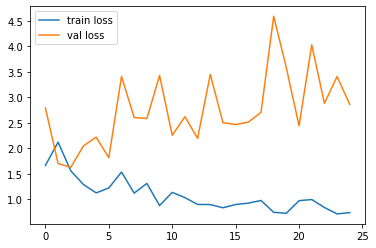

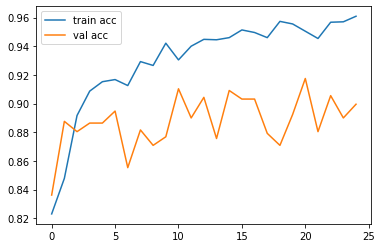

In [24]:
import matplotlib.pyplot as plt
plt.plot(hk.history['loss'], label='train loss')
plt.plot(hk.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(hk.history['accuracy'], label='train acc')
plt.plot(hk.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [25]:
h_predit =model.predict(test_set)

53/53 [==============================] - 68s 1s/step


In [26]:
h_predit

array([[9.9999994e-01, 5.2354810e-33, 5.4352437e-17, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9671912e-01, 0.0000000e+00, 3.2809444e-03, 1.1910941e-36],
       ...,
       [9.9992204e-01, 0.0000000e+00, 7.7906232e-05, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [27]:
import numpy as np
h_predit = np.argmax(h_predit, axis=1)

In [28]:
h_predit

array([0, 1, 0, 2, 3, 3, 0, 3, 1, 1, 0, 2, 1, 2, 0, 3, 3, 2, 3, 3, 0, 0,
       0, 0, 3, 1, 3, 1, 0, 1, 3, 1, 2, 3, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 3, 0, 1, 1, 1, 1, 0, 0, 3, 3, 0, 1, 0, 3, 0, 0, 2, 2, 3, 0, 1,
       3, 3, 2, 0, 2, 3, 3, 3, 1, 0, 2, 3, 1, 0, 3, 3, 1, 3, 3, 3, 1, 1,
       1, 2, 3, 1, 1, 3, 1, 2, 0, 3, 3, 3, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       2, 2, 3, 1, 1, 2, 2, 0, 2, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 1, 1, 2,
       0, 3, 2, 1, 3, 3, 0, 2, 3, 1, 0, 1, 1, 0, 0, 0, 1, 3, 0, 3, 1, 3,
       1, 0, 2, 1, 2, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0,
       0, 1, 3, 0, 0, 0, 1, 2, 3, 1, 3, 0, 0, 2, 1, 2, 3, 3, 3, 0, 1, 3,
       1, 3, 0, 3, 0, 3, 1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 2, 0, 3, 0, 1, 2,
       0, 1, 0, 3, 3, 3, 0, 0, 3, 2, 0, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0,
       3, 1, 1, 0, 3, 3, 3, 3, 1, 3, 2, 1, 2, 1, 1, 0, 1, 2, 3, 0, 0, 1,
       1, 3, 0, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3,
       0, 3, 3, 3, 2, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3,

In [57]:
from keras.models import load_model
from keras.preprocessing import image

from keras.utils import load_img

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


path ='/content/grive/MyDrive'





Mounted at /content/gdrive


The below code is making preditions from the images the model has not seen

In [58]:
img =image.image_utils.load_img('/content/gdrive/MyDrive/test_images/Corn_Health (1140).jpg', target_size=(224,224))

In [59]:
ine = image.image_utils.img_to_array(img)
print(ine)

[[[ 60.  92.  45.]
  [ 59.  91.  44.]
  [ 58.  90.  43.]
  ...
  [195. 166. 132.]
  [206. 171. 143.]
  [202. 165. 139.]]

 [[ 59.  90.  46.]
  [ 58.  89.  45.]
  [ 58.  89.  45.]
  ...
  [191. 165. 130.]
  [201. 167. 139.]
  [210. 174. 148.]]

 [[ 56.  89.  46.]
  [ 56.  89.  46.]
  [ 56.  89.  46.]
  ...
  [179. 156. 122.]
  [180. 150. 122.]
  [196. 164. 139.]]

 ...

 [[ 26.  56.  28.]
  [ 28.  59.  28.]
  [ 31.  62.  31.]
  ...
  [134. 161. 118.]
  [127. 154. 111.]
  [172. 199. 156.]]

 [[ 26.  56.  32.]
  [ 26.  56.  32.]
  [ 26.  56.  30.]
  ...
  [136. 163. 120.]
  [128. 155. 112.]
  [153. 180. 137.]]

 [[ 22.  54.  33.]
  [ 24.  53.  31.]
  [ 22.  51.  29.]
  ...
  [145. 172. 129.]
  [138. 165. 122.]
  [147. 174. 131.]]]


In [60]:
ine.shape

(224, 224, 3)

In [61]:
ine =ine/255

In [62]:
import numpy as np
ine=np.expand_dims(ine,axis=0)
img_data=preprocess_input(ine)
img_data.shape

(1, 224, 224, 3)

In [63]:
y_pred = model.predict(img_data)

1/1 [==============================] - 0s 111ms/step


In [64]:
y_pred

array([[2.9697644e-36, 1.0000000e+00, 4.1780394e-26, 4.4875809e-27]],
      dtype=float32)

In [65]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [66]:
y_pred

array([1])